In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import glob as gb
import png
import re
import os
from numpy import genfromtxt
from PIL import Image
import cv2

# %matplotlib inline
# plt.style.use('ggplot')
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
# plt.rcParams["figure.figsize"] = (12,12)
# pd.options.display.max_columns = None
# pd.options.display.precision = 4

In [3]:
def bandseperatedimages(path):
    X=[]
    files = gb.glob(pathname= str(path+'/*.jpeg'))
    for i in files:
        image = cv2.imread(i)
        X.append(image)
    return X

In [4]:
path = 'C:/Users/ayush/OneDrive/Coherence/Coherence Final Input'

In [5]:
X1=bandseperatedimages(path)

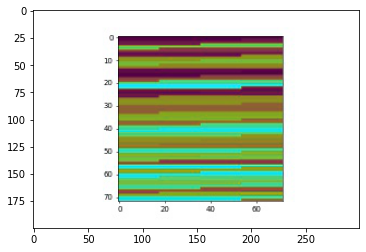

In [6]:
plt.imshow(X1[0])

In [7]:
X1[0].shape

(200, 300, 3)

In [8]:
ans = np.array(X1)

In [11]:
labels=[558_0,559_2,561_2,565_2,567_2,586_0,587_2,591_2,592_1,594_1,595_1,597_1,598_0,602_0,604_0,
        605_1,606_0,607_1,610_1,613_1,614_1,616_1,618_0,622_2,624_2,625_1,626_1,627_1,628_2]
#controlled=0
#past=1
#current=2
labels1 = [0,2,2,2,2,0,2,2,1,1,1,1,0,0,0,
        1,0,1,1,1,1,1,0,2,2,1,1,1,2]
y=labels1

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ans, y, test_size=0.3,shuffle=True)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [14]:
batch_size = 25
num_classes = 3
epochs = 100

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = keras.models.Sequential()
model.add(Conv2D(16,(3,3),input_shape=(200,300,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(3,activation='sigmoid'))


opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='binary_crossentropy',
optimizer=opt,
metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)
# model.summary()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20 samples, validate on 9 samples
Epoch 1/100
20/20 [==============================] - 4s 184ms/step - loss: 5.2387 - accuracy: 0.4000 - val_loss: 5.7222 - val_accuracy: 0.6667
Epoch 2/100
20/20 [==============================] - 1s 70ms/step - loss: 5.5680 - accuracy: 0.6667 - val_loss: 3.8259 - val_accuracy: 0.5556
Epoch 3/100
20/20 [==============================] - 1s 67ms/step - loss: 2.6737 - accuracy: 0.6667 - val_loss: 3.5412 - val_accuracy: 0.5556
Epoch 4/100
20/20 [==============================] - 1s 64ms/step - loss: 3.7615 - accuracy: 0.5333 - val_loss: 1.9315 - val_accuracy: 0.7037
Epoch 5/100
20/20 [==============================] - 1s 70ms/step - loss: 1.5456 - accuracy: 0.7667 - val_loss: 1.2483 - val_accuracy: 0.6667
Epoch 6/100
20/20 [==============================] - 1s 60ms/step - loss: 0.8117 - accuracy: 0.8000 - val_loss: 0.6761 - val_accuracy: 0.6296
Epoch 7/

Epoch 53/100
20/20 [==============================] - 1s 60ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.6140 - val_accuracy: 0.7037
Epoch 54/100
20/20 [==============================] - 1s 58ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.5797 - val_accuracy: 0.7407
Epoch 55/100
20/20 [==============================] - 1s 59ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.6151 - val_accuracy: 0.7037
Epoch 56/100
20/20 [==============================] - 1s 58ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.5912 - val_accuracy: 0.7778
Epoch 57/100
20/20 [==============================] - 1s 59ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.6109 - val_accuracy: 0.7037
Epoch 58/100
20/20 [==============================] - 1s 58ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.5947 - val_accuracy: 0.7778
Epoch 59/100
20/20 [==============================] - 1s 58ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.6100 - val_accuracy: 0.7037